## 데이터 이해하기

1. 데이터의 사이즈는? 모델 학습에 적합한 형태인가?
2. Train/Test는 어떻게 분리되어 있는가?
3. Missing Value는?
4. Target Variable의 분포는?
5. 간단히 데이터 살펴보기
6. 데이터의 특이한/주목해야할 부분은?

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from tqdm import tqdm
import gc
import random
import lightgbm as lgb
import re
from sklearn.metrics import *
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import os

PATH = 'd:/Programming/2021.01.데이콘_LGai/data/'

for dirname, _, filenames in os.walk(PATH):
    for filename in filenames:
        print(os.path.join(dirname, filename))

d:/Programming/2021.01.데이콘_LGai/data/sample_submission.csv
d:/Programming/2021.01.데이콘_LGai/data/test_err_data.csv
d:/Programming/2021.01.데이콘_LGai/data/test_quality_data.csv
d:/Programming/2021.01.데이콘_LGai/data/train_err_data.csv
d:/Programming/2021.01.데이콘_LGai/data/train_problem_data.csv
d:/Programming/2021.01.데이콘_LGai/data/train_quality_data.csv


In [3]:
train_err  = pd.read_csv(PATH+'train_err_data.csv')
train_quality  = pd.read_csv(PATH+'train_quality_data.csv')
train_problem  = pd.read_csv(PATH+'train_problem_data.csv')

test_err  = pd.read_csv(PATH+'test_err_data.csv')
test_quality  = pd.read_csv(PATH+'test_quality_data.csv')

In [4]:
display(train_err)
display(test_err)

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,10000,20201101030309,model_3,05.15.2138,12,1
2,10000,20201101030309,model_3,05.15.2138,11,1
3,10000,20201101050514,model_3,05.15.2138,16,1
4,10000,20201101050515,model_3,05.15.2138,4,0
...,...,...,...,...,...,...
16554658,24999,20201130163051,model_3,05.15.2138,15,1
16554659,24999,20201130172625,model_3,05.15.2138,16,1
16554660,24999,20201130172625,model_3,05.15.2138,4,0
16554661,24999,20201130172631,model_3,05.15.2138,4,0


,user_id,time,model_nm,fwver,errtype,errcode
0,30000,20201101030227,model_1,04.16.3553,31,1
1,30000,20201101030227,model_1,04.16.3553,33,2
2,30000,20201101030228,model_1,04.16.3553,15,1
3,30000,20201101030256,model_1,04.16.3553,22,1
4,30000,20201101030300,model_1,04.16.3553,11,1
...,...,...,...,...,...,...
16532643,44998,20201130210050,model_1,04.16.3553,40,0
16532644,44998,20201130211831,model_1,04.16.3553,31,1
16532645,44998,20201130211832,model_1,04.16.3553,15,1
16532646,44998,20201130212259,model_1,04.16.3553,16,1


In [5]:
display(train_quality)
display(test_quality)

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
1,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
2,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
3,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
4,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828619,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,1,0,0,0,0,17,0,0
828620,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,0,0,0,0,0,17,0,0
828621,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,3,0,0,0,0,17,0,0
828622,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,0,0,0,0,0,17,0,0


,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,20201128195000,30000,04.33.1261,0.0,0,0.0,0,0,0,0,5,0,0,2,0,0
1,20201128195000,30000,04.33.1261,0.0,0,0.0,0,0,0,0,5,0,0,2,0,0
2,20201128195000,30000,04.33.1261,0.0,0,0.0,0,0,0,0,5,0,0,2,0,0
3,20201128195000,30000,04.33.1261,0.0,0,0.0,0,0,0,0,5,0,0,2,0,0
4,20201128195000,30000,04.33.1261,0.0,0,0.0,0,0,0,0,5,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747967,20201125180000,44997,04.22.1750,0.0,0,0.0,0,0,2,0,0,0,0,3,0,0
747968,20201125180000,44997,04.22.1750,0.0,0,0.0,0,0,0,0,0,0,0,3,0,0
747969,20201125180000,44997,04.22.1750,0.0,0,0.0,0,0,0,0,0,0,0,3,0,0
747970,20201125180000,44997,04.22.1750,0.0,0,0.0,0,0,0,0,0,0,0,3,0,0


<AxesSubplot:>

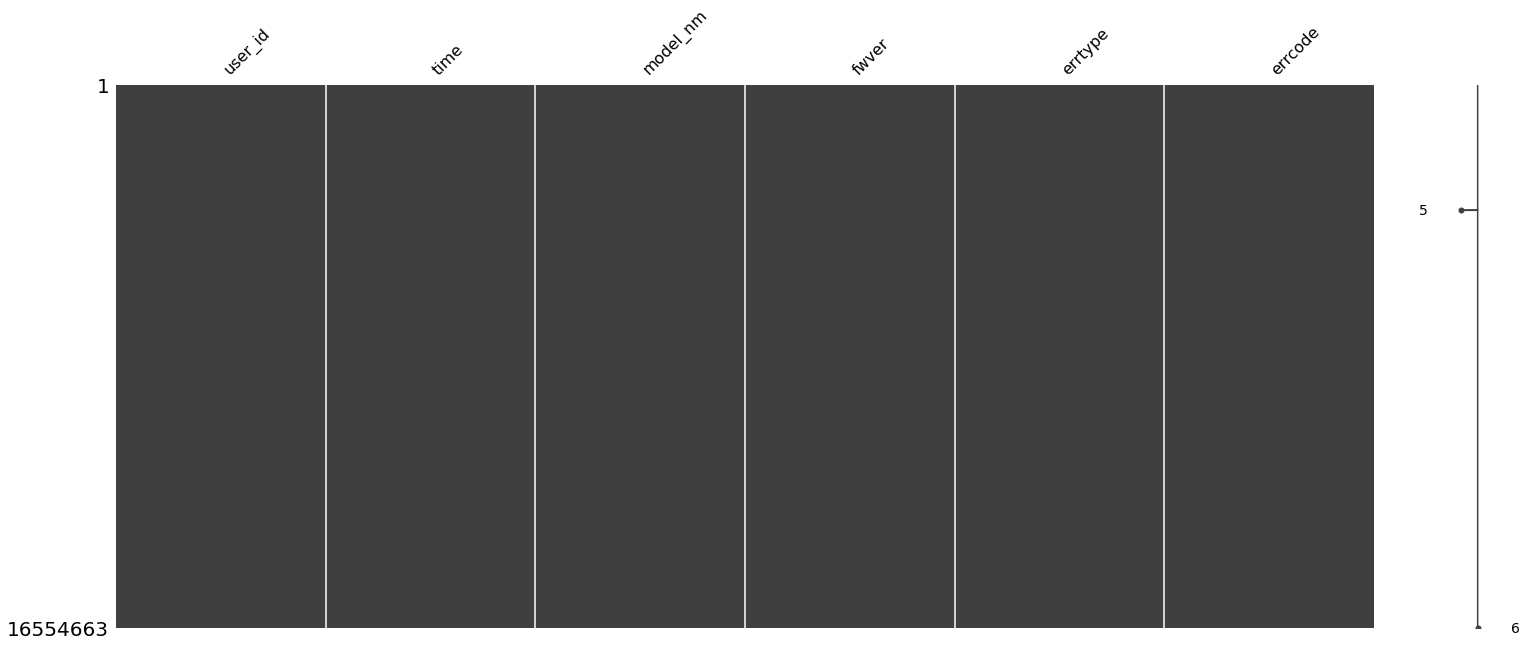

In [6]:
# msno.matrix(train_err) # 개오래걸리네 걍 쓰지말자

In [7]:
print(train_err.isnull().sum())
print(test_err.isnull().sum())

user_id     0
time        0
model_nm    0
fwver       0
errtype     0
errcode     1
dtype: int64
user_id     0
time        0
model_nm    0
fwver       0
errtype     0
errcode     4
dtype: int64


In [8]:
print(train_quality.isnull().sum())
print(test_quality.isnull().sum())

time               0
user_id            0
fwver          40080
quality_0     144432
quality_1          0
quality_2      40113
quality_3          0
quality_4          0
quality_5         20
quality_6          0
quality_7          0
quality_8          0
quality_9          0
quality_10         0
quality_11         0
quality_12         0
dtype: int64
time               0
user_id            0
fwver          22764
quality_0     106584
quality_1         11
quality_2      21115
quality_3          0
quality_4          0
quality_5         44
quality_6          0
quality_7          0
quality_8          0
quality_9          0
quality_10         0
quality_11         0
quality_12         0
dtype: int64


In [9]:
print('err 데이터 train/test 비교\n')

print('=== user_id ===\n')
print(len(train_err['user_id'].unique()), '개 ', np.sort(train_err['user_id'].unique()))
print(len(test_err['user_id'].unique()), '개 ', np.sort(test_err['user_id'].unique()))

print('\n=== time ===\n')
print(len(train_err['time'].unique()), '개 ', np.sort(train_err['time'].unique()))
print(len(test_err['time'].unique()), '개 ', np.sort(test_err['time'].unique()))

print('\n=== model_nm ===\n')
print(len(train_err['model_nm'].unique()), '개 ', np.sort(train_err['model_nm'].unique()))
print(len(test_err['model_nm'].unique()), '개 ', np.sort(test_err['model_nm'].unique()))

print('\n=== fwver ===\n')
print(len(train_err['fwver'].unique()), '개 ', np.sort(train_err['fwver'].unique()))
print(len(test_err['fwver'].unique()), '개 ', np.sort(test_err['fwver'].unique()))

print('\n=== errtype ===\n')
print(len(train_err['errtype'].unique()), '개 ', np.sort(train_err['errtype'].unique()))
print(len(test_err['errtype'].unique()), '개 ', np.sort(test_err['errtype'].unique()))

print('\n=== errcode ===\n')
print(len(train_err['errcode'].unique()), '개 ', train_err['errcode'].unique())
print(len(test_err['errcode'].unique()), '개 ', test_err['errcode'].unique()) # errcode는 문자열도 섞여있음.

err 데이터 train/test 비교

=== user_id ===

15000 개  [10000 10001 10002 ... 24997 24998 24999]
14998 개  [30000 30001 30002 ... 44996 44997 44998]

=== time ===

2566163 개  [20201031235959 20201101000000 20201101000001 ... 20201202024135
 20201202031447 20201202185152]
2567716 개  [20201031235959 20201101000000 20201101000001 ... 20201209160337
 20201211203507 20201214120118]

=== model_nm ===

9 개  ['model_0' 'model_1' 'model_2' 'model_3' 'model_4' 'model_5' 'model_6'
 'model_7' 'model_8']
9 개  ['model_0' 'model_1' 'model_2' 'model_3' 'model_4' 'model_5' 'model_6'
 'model_7' 'model_8']

=== fwver ===

37 개  ['03.11.1141' '03.11.1149' '03.11.1167' '04.16.2641' '04.16.3345'
 '04.16.3439' '04.16.3553' '04.16.3569' '04.16.3571' '04.22.1442'
 '04.22.1656' '04.22.1666' '04.22.1684' '04.22.1750' '04.22.1778'
 '04.33.1095' '04.33.1125' '04.33.1149' '04.33.1171' '04.33.1185'
 '04.33.1261' '04.73.2237' '04.73.2571' '04.82.1684' '04.82.1730'
 '04.82.1778' '05.15.2090' '05.15.2092' '05.15.2114' '05.15.

In [10]:
print('quality 데이터 train/test 비교')

for i in range(len(train_quality.columns)):
    print('\n===', train_quality.columns[i], '===\n')
    if i == 2:
        print(len(train_quality[train_quality.columns[i]].unique()), '개 ', train_quality[train_quality.columns[i]].unique())
        print(len(test_quality[test_quality.columns[i]].unique()), '개 ', test_quality[test_quality.columns[i]].unique())
    else:
        print(len(train_quality[train_quality.columns[i]].unique()), '개 ', train_quality[train_quality.columns[i]].unique())
        print(len(test_quality[test_quality.columns[i]].unique()), '개 ', test_quality[test_quality.columns[i]].unique())

quality 데이터 train/test 비교

=== time ===

4319 개  [20201129090000 20201130210000 20201104110000 ... 20201126034000
 20201113065000 20201116061000]
4317 개  [20201128195000 20201102202000 20201104202000 ... 20201114055000
 20201125074000 20201126053000]

=== user_id ===

8281 개  [10000 10002 10004 ... 24993 24995 24997]
8268 개  [30000 30001 30002 ... 44994 44996 44997]

=== fwver ===

28 개  ['05.15.2138' '04.22.1750' '04.16.3553' '04.33.1261' '04.22.1778'
 '04.33.1185' '04.16.3571' '05.66.3571' '03.11.1149' '03.11.1167'
 '04.82.1684' '04.82.1778' '04.33.1149' nan '05.66.3237' '04.73.2237'
 '09.17.1431' '04.22.1684' '05.15.2120' '04.33.1125' '05.15.2122'
 '04.22.1666' '04.22.1656' '04.16.3439' '04.73.2571' '05.15.2114'
 '04.16.3345' '04.22.1442']
23 개  ['04.33.1261' '05.15.2138' '04.22.1750' '04.22.1778' '04.16.3553'
 '09.17.1431' '03.11.1167' '04.33.1149' '04.33.1185' '04.22.1684'
 '04.82.1684' nan '04.16.3571' '04.73.2571' '04.82.1778' '04.73.2237'
 '05.66.3237' '05.66.3571' '03.11.1149'

In [11]:
int(train_quality[train_quality.columns[3]].unique()[0])

0

In [12]:
train_quality[train_quality.columns[3]].unique()[0]

0.0

In [14]:
list(map(int, train_quality[train_quality.columns[3]].unique()))

ValueError: cannot convert float NaN to integer

In [17]:
ex = train_err.dropna()

In [18]:
ex['errcode'].isnull().sum()

0